# Affinity Analysis - Learning Association Rules:

## Introduction/Purpose:

In this notebook, I discuss the **meaning+definitions+metrics** related to Association Rules, and how to **reliably interpret and use** the rules produced by the Apriori algorithms. I *do not* discuss the Apriori Algorithm itself - as this is largely blackboxed and explained in the sources included in this project folder. The Apriori algorithm uses a number of clever hacks to find itemsets in reasonable computational time.  This problem was solved years ago, and in depth understanding isn't necessary to do Association Analysis. 




## Basic Definitions:

Let T be the set of all transactions. 
Let $x_{i}$ be in the set of all items, I. 
Let X,Y,Z... be item-sets (not empty), that contain some subset of x$_{i}$'s from I.

**Support Count Function:** defined as $\sigma(X) = \{ t_{i} \vert X \in t_{i}, t_{i} \in T  \}$. Note that when we count each transaction, *X must be contained in its entirety*.

**Set Count**: Define $\vert X \vert$ to be a count of the number of elements in the given set.

**Association Rule:** $X \rightarrow Y$: An implication, where X,Y $\subseteq$ I and X $\cap$ Y = $\emptyset$. 
- This is not to be taken literally. Recall that a Set Theory Implication is one where X $\subseteq$ Y. This means that X is contained in Y. It cannot be the case that we find a point in X that is not in Y (Here, $\mathbb{T} \rightarrow \mathbb{F}$, not possible). For most association rules, there will exist transactions where X is present, but not Y. The implication is ideal. See the conviction metric for a measure of strength of implication (further down).

## Strength/Co-Occurence Measures:

*Note:* Let $\vert T \vert = N$

### Support (of an Itemset): 

$$s(X) = \frac{\sigma(X)}{N} $$.

- Or, proportion of transactions in which itemset X occurs.
- Range: (0,1)
- In general, for $\vert X_{i} \vert > \vert X_{j} \vert$, $s(X_{i}) \leq s(X_{j})$. As our set X increases in size, the set of transactions that contain it entirely must stay the same, or shrink.

### Support (of a Rule): 

$$s(X \rightarrow Y) = \frac{\sigma(X \cup Y)}{N} $$.

- Or, proportion of transactions in which $Z = X \cup  Y$ occur.
- Range: (0,1)
- Again, for $\vert Z_{i} \vert > \vert Z_{j} \vert$, $s(Z_{i}) \leq s(Z_{j})$.
- Practically, Support is used to determine if our rule is just a random occurence, or actually something to consider. A *strong* rule is one that has relatively high support.


### Confidence:

$$ c(X \rightarrow Y) = \frac{\sigma(X \cup Y)}{\sigma(X)} = \frac{s(X \rightarrow Y)}{s(X)} $$

- Or, the proportion of transactions containing X and Y, over the proportion of transactions containing X. 

- Range: (0,1)
-  Measure of reliability that Y is likely to be present in transactions that contain X. Because Confidence is rarely 1, it can be the case that Y is present but not X. 
- **Claim**: Confidence provides an estimate for conditional probability. Note that we defined X $\cap$ Y = $\emptyset$, and since P(X $\vert$ Y) = P(XY) / P(Y) = 0, this doesn't initially make sense. Note that  X $\cup$ Y is used in support calculations. Generally, P(X $\cup$ Y) >= P(X $\cap$ Y), so this provides an **overestimate** of conditional probability.




## Objective Interest Measures:

These are measures that use transactional data to rank different rules. These measures provide statistical information, and are considered to be domain independent (don't need special/expert information to make judgements). 

One limitation of this method, is that a user must specify thresholds to allow for a cutoff of ranked rules. There is no rule on what cutoff one should choose - and rules for this may require domain knowledge. 

The usual approach is to couple support and confidence together, to rank the best rules. These approaches have limitations however, as discussed below.

### Interpreting 2-Term Rules with Contingency Table:

Given $\{A\} \rightarrow \{B\}$, we can form the following contingency table:

CT | B | $\thicksim$ B | Marg(A)
--- | --- | --- | ---
**A** | f$_{11}$ | f$_{10}$ | f$_{1+}$
**$\thicksim$ A** | f$_{01}$ | f$_{11}$ | f$_{0+}$
**Marg(B)** | f$_{+1}$ | f$_{+0}$ | N

#### Define:

- Support: $\frac{f_{11}}{N}$
- Confidence: $\frac{f_{11}}{f_{1+}}$
- Lift: $\frac{N f_{11}}{f_{1+}f_{+1}}$

#### Probabilistic Interpretation:
- Support is the probability that two itemsets occur together in a set of transactions.
- Confidence is a conditional probability measure, that estimates P(Y | X)
- Lift measures the correlation between two itemsets.

### Other Measures:

**Conviction:** $$ cv(A \rightarrow B) = \frac{1 - s(B)}{1 - c(A,B)} $$

This is another measure of the strength of implication. The higher the number, the stronger the implication. 

- Range: (0,$\infty$)

- Non-Commutative: cv(A,B) $\neq$ cv(B,A)

- If A,B are independent, then 1.

- Takes into account antecendent, and consequent. (note: Confidence does not).

- If full confidence (in implication), value is infinite. A higher value means we are closer to true implication.


**Lift**: 

$$l(A \rightarrow B)  = \frac{s(A,B)}{s(A) x s(B)}$$

Lift is an estimate of correlation. Recall that A and B are indepedent if P(AB) = P(A) x P(B). Since support is just a measure of probability an itemset occurs in a sample, we can define this in terms of support: $s_{\perp} = s(A)s(B)$. Then **lift is a ratio of joint rule support, over indepenently calculated rule support.**

#### Interpretation:

- Lift = 1: Then s(AB) = s(A)s(B). This means our two itemsets are independent.

- Lift > 1: Then s(AB) > s(A)s(B). A positive correlation exists between A and B.

- Lift < 1: Then s(AB) < s(A)s(B). A negative correlation exists between A and B.


#### Calculating Independence with Contingency Values:

$$ s(AB) = s(A)s(B) \rightarrow \frac{f_{11}}{N} = \frac{f_{1+}f_{+1}}{N^{2}} \rightarrow f_{11} = \frac{f_{1+}f_{+1}}{N} $$

The last term must hold if there is indepedence between A and B.


### Examples when Confidence and Support Fail:

#### Example 1 (over-estimate): $\{Tea\} \rightarrow \{Coffee\}$

CT | Coffee | $\thicksim$ Coffee | Marg(Tea)
--- | --- | --- | ---
**Tea** | 150 | 50 | 200
**$\thicksim$ Tea** | 650 | 150 | 800
**Marg(Coffee)** | 800 | 200 | 1000

Here, we see that s(T -> C) = 150/100 = 15%. Confidence is 150/200 = 75%. These are decent numbers. On closer inspection however, 80% of our sample drink coffee. Yet, for all Tea Drinkers, only 75% drink coffee. So this suggests that tea is negatively associated with coffee.

##### Trying Conviction and Lift:

Using the following formulae:

$$l(A,B) = \tfrac{N f_{11}}{f_{1+} f_{+1}} \;\;\; cv(A,B) = \tfrac{1 - \tfrac{f_{+1}}{N}}{1 - \tfrac{f_{11}}{f_{1+}}} $$

L(Coffee,Tea) = 0.9375, cv(Coffee,Tea) = 0.8. Our Lift tells us of a slight negative correlation, which was hyposited from the contingency table above. Support and Confidence alone were unable to indicate this.


#### Example 2 (underestimate): $\{Tea\} \rightarrow \{Honey\}$

CT | Honey | $\thicksim$ Honey | Marg(Tea)
--- | --- | --- | ---
**Tea** | 100 | 100 | 200
**$\thicksim$ Tea** | 20 | 780 | 800
**Marg(Coffee)** | 120 | 880 | 1000

Here, we have a rule support of 10%, and confidence of 50%. Yet, tea is very strongly associated with honey (positive relationship). Note that 12% of the sample uses honey, and 100/120 honey users drink tea. Conversely, the number of people who don't use honey is 88%. 

Both examples illustrate that support and confidence do not measure correlation between two variables, and sometimes give misleading results. In example 2, our confidence wasn't very good, but clearly honey and tea have a positive relationship.

##### Trying Conviction and Lift:

Here, l(tea,honey) = 4.166, and cv(tea,honey) = 1.76. Again, our lift indicates a positive relationship. Conviction is above 1, but its not clear if its any good.



## Code, Examples and Experiments:

In [2]:
#Imports
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import altair as alt
#import pyvis
from pyvis.network import Network

In [3]:
#Standard Settings:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
alt.renderers.enable('notebook')
alt.data_transformers.enable('default', max_rows=None)
%matplotlib inline 
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 40)
pd.set_option('display.width', 1000)

### Support Functions:

In [4]:
#Note: Body/work done by these functions was taken from the following blog:
#https://pbpython.com/market-basket-analysis.html
#all credit goes to the author/coder.

def loadcleandata(cty):
    df = pd.read_excel('./data/online_retail.xlsx') #Why did a 20MB file take 1min to load??
    df['Description'] = df['Description'].str.strip()
    df.dropna(axis=0, subset=['InvoiceNo'], inplace=True)
    df['InvoiceNo'] = df['InvoiceNo'].astype('str')
    df = df[~df['InvoiceNo'].str.contains('C')]    
    
    basket = (df[df['Country'] ==cty].groupby(['InvoiceNo', 'Description'])["Quantity"])
    basket = basket.sum().unstack().reset_index().fillna(0).set_index('InvoiceNo') 
    basket_sets = basket.applymap(encode_units) 
    basket_sets.drop('POSTAGE', inplace=True, axis=1)
    return basket_sets

    
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

#Note, you still need to sort the DF of rules that you get.

def getrules(bsets,minsup,met):
    frequent_itemsets = apriori(bsets, min_support=minsup, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric=met, min_threshold=1)
    return rules

### Simple Code Example: Get some Rules:

In [5]:
#Start up Code Example:
df = loadcleandata("Germany")
rules = getrules(df,0.05,"lift") #Do you even...
rules.sort_values(by=["lift","conviction"],ascending=False).head(3)

antecedents                         consequents  antecedent support  consequent support   support  confidence      lift  leverage  conviction
11    (RED RETROSPOT CHARLOTTE BAG)            (WOODLAND CHARLOTTE BAG)            0.070022            0.126915  0.059081    0.843750  6.648168  0.050194    5.587746
10         (WOODLAND CHARLOTTE BAG)       (RED RETROSPOT CHARLOTTE BAG)            0.126915            0.070022  0.059081    0.465517  6.648168  0.050194    1.739959
1   (PLASTERS IN TIN CIRCUS PARADE)  (PLASTERS IN TIN WOODLAND ANIMALS)            0.115974            0.137856  0.067834    0.584906  4.242887  0.051846    2.076984

### Experimenting with Rule Support, Lift and Conviction:

First, I try different combinations. We have a few different cases to try.

In [11]:
#Case 3: Rule Metric: Lift. Sort: Conviction, Support.
rules = getrules(df,0.05,"lift") #Do you even...
rules.sort_values(by=["conviction","support"],ascending=False).head()

antecedents                           consequents  antecedent support  consequent support   support  confidence      lift  leverage  conviction
10        (RED RETROSPOT CHARLOTTE BAG)              (WOODLAND CHARLOTTE BAG)            0.070022            0.126915  0.059081    0.843750  6.648168  0.050194    5.587746
12  (ROUND SNACK BOXES SET OF 4 FRUITS)  (ROUND SNACK BOXES SET OF4 WOODLAND)            0.157549            0.245077  0.131291    0.833333  3.400298  0.092679    4.529540
14                 (SPACEBOY LUNCH BOX)  (ROUND SNACK BOXES SET OF4 WOODLAND)            0.102845            0.245077  0.070022    0.680851  2.778116  0.044817    2.365427
0       (PLASTERS IN TIN CIRCUS PARADE)    (PLASTERS IN TIN WOODLAND ANIMALS)            0.115974            0.137856  0.067834    0.584906  4.242887  0.051846    2.076984
7            (PLASTERS IN TIN SPACEBOY)    (PLASTERS IN TIN WOODLAND ANIMALS)            0.107221            0.137856  0.061269    0.571429  4.145125  0.046488    2.011670

In [12]:
#Case 4: Rule Metric: Lift. Sort: Support, Conviction.
rules = getrules(df,0.05,"lift") #Do you even...
rules.sort_values(by=["support","conviction"],ascending=False).head()

antecedents                           consequents  antecedent support  consequent support   support  confidence      lift  leverage  conviction
12   (ROUND SNACK BOXES SET OF 4 FRUITS)  (ROUND SNACK BOXES SET OF4 WOODLAND)            0.157549            0.245077  0.131291    0.833333  3.400298  0.092679    4.529540
13  (ROUND SNACK BOXES SET OF4 WOODLAND)   (ROUND SNACK BOXES SET OF 4 FRUITS)            0.245077            0.157549  0.131291    0.535714  3.400298  0.092679    1.814509
9     (PLASTERS IN TIN WOODLAND ANIMALS)  (ROUND SNACK BOXES SET OF4 WOODLAND)            0.137856            0.245077  0.074398    0.539683  2.202098  0.040613    1.640006
8   (ROUND SNACK BOXES SET OF4 WOODLAND)    (PLASTERS IN TIN WOODLAND ANIMALS)            0.245077            0.137856  0.074398    0.303571  2.202098  0.040613    1.237951
14                  (SPACEBOY LUNCH BOX)  (ROUND SNACK BOXES SET OF4 WOODLAND)            0.102845            0.245077  0.070022    0.680851  2.778116  0.044817    2.365427

In [13]:
#Case 5: Rule Metric: Conviction. Sort: Lift, Support
rules = getrules(df,0.05,"conviction") 
rules.sort_values(by=["lift","support"],ascending=False).head()

antecedents                         consequents  antecedent support  consequent support   support  confidence      lift  leverage  conviction
10       (RED RETROSPOT CHARLOTTE BAG)            (WOODLAND CHARLOTTE BAG)            0.070022            0.126915  0.059081    0.843750  6.648168  0.050194    5.587746
11            (WOODLAND CHARLOTTE BAG)       (RED RETROSPOT CHARLOTTE BAG)            0.126915            0.070022  0.059081    0.465517  6.648168  0.050194    1.739959
0      (PLASTERS IN TIN CIRCUS PARADE)  (PLASTERS IN TIN WOODLAND ANIMALS)            0.115974            0.137856  0.067834    0.584906  4.242887  0.051846    2.076984
1   (PLASTERS IN TIN WOODLAND ANIMALS)     (PLASTERS IN TIN CIRCUS PARADE)            0.137856            0.115974  0.067834    0.492063  4.242887  0.051846    1.740427
6   (PLASTERS IN TIN WOODLAND ANIMALS)          (PLASTERS IN TIN SPACEBOY)            0.137856            0.107221  0.061269    0.444444  4.145125  0.046488    1.607002

In [14]:
#Case 6: Rule Metric: Conviction. Sort: Support,Lift
rules = getrules(df,0.05,"conviction") 
rules.sort_values(by=["support","lift"],ascending=False).head()

antecedents                           consequents  antecedent support  consequent support   support  confidence      lift  leverage  conviction
12   (ROUND SNACK BOXES SET OF 4 FRUITS)  (ROUND SNACK BOXES SET OF4 WOODLAND)            0.157549            0.245077  0.131291    0.833333  3.400298  0.092679    4.529540
13  (ROUND SNACK BOXES SET OF4 WOODLAND)   (ROUND SNACK BOXES SET OF 4 FRUITS)            0.245077            0.157549  0.131291    0.535714  3.400298  0.092679    1.814509
8   (ROUND SNACK BOXES SET OF4 WOODLAND)    (PLASTERS IN TIN WOODLAND ANIMALS)            0.245077            0.137856  0.074398    0.303571  2.202098  0.040613    1.237951
9     (PLASTERS IN TIN WOODLAND ANIMALS)  (ROUND SNACK BOXES SET OF4 WOODLAND)            0.137856            0.245077  0.074398    0.539683  2.202098  0.040613    1.640006
14                  (SPACEBOY LUNCH BOX)  (ROUND SNACK BOXES SET OF4 WOODLAND)            0.102845            0.245077  0.070022    0.680851  2.778116  0.044817    2.365427

After looking at the above dataframes, it seems to me that rule support should really be a pre-screening threshold to limit how many rules we generate. Again, choice of support depends on many factors, including data set size, budget, what kinds of goals/questions we have, etc.

For now, Lift and Conviction seem to be the two choice metrics to. Lift itself, is multi-faceted: it indicates positive and negative correlations, which allows us to select for rules with positive/negative potential relationships. Conviction allows us to measure the strength of our rules. These will be used to select the final rules, most likely.

**Also Note:** There is bidirectionality in the rules in the table. The stronger direction of the two rules between each itemset needs to be selected, and the weaker one clipped away.

In [8]:
#Top 10 rules by lift
#Case 5: Rule Metric: Conviction. Sort: Lift, Support
rules = getrules(df,0.05,"lift") 
rules.sort_values(by=["lift"],ascending=False).head(10)

antecedents                           consequents  antecedent support  consequent support   support  confidence      lift  leverage  conviction
10         (RED RETROSPOT CHARLOTTE BAG)              (WOODLAND CHARLOTTE BAG)            0.070022            0.126915  0.059081    0.843750  6.648168  0.050194    5.587746
11              (WOODLAND CHARLOTTE BAG)         (RED RETROSPOT CHARLOTTE BAG)            0.126915            0.070022  0.059081    0.465517  6.648168  0.050194    1.739959
0        (PLASTERS IN TIN CIRCUS PARADE)    (PLASTERS IN TIN WOODLAND ANIMALS)            0.115974            0.137856  0.067834    0.584906  4.242887  0.051846    2.076984
1     (PLASTERS IN TIN WOODLAND ANIMALS)       (PLASTERS IN TIN CIRCUS PARADE)            0.137856            0.115974  0.067834    0.492063  4.242887  0.051846    1.740427
6             (PLASTERS IN TIN SPACEBOY)    (PLASTERS IN TIN WOODLAND ANIMALS)            0.107221            0.137856  0.061269    0.571429  4.145125  0.046488    2.011670
7     (PLASTERS IN TIN WOODLAND ANIMALS)            (PLASTERS IN TIN SPACEBOY)            0.137856            0.107221  0.061269    0.444444  4.145125  0.046488    1.607002
13   (ROUND SNACK BOXES SET OF 4 FRUITS)  (ROUND SNACK BOXES SET OF4 WOODLAND)            0.157549            0.245077  0.131291    0.833333  3.400298  0.092679    4.529540
12  (ROUND SNACK BOXES SET OF4 WOODLAND)   (ROUND SNACK BOXES SET OF 4 FRUITS)            0.245077            0.157549  0.131291    0.535714  3.400298  0.092679    1.814509
15                  (SPACEBOY LUNCH BOX)  (ROUND SNACK BOXES SET OF4 WOODLAND)            0.102845            0.245077  0.070022    0.680851  2.778116  0.044817    2.365427
14  (ROUND SNACK BOXES SET OF4 WOODLAND)                  (SPACEBOY LUNCH BOX)            0.245077            0.102845  0.070022    0.285714  2.778116  0.044817    1.256018

In [10]:
rules["conviction"].max()
rules.shape

5.587746170678341

(18, 9)

### Question: What relationship exists between Conviction and Confidence?

Lets do a point plot and find out. We see a super-linear relationship. It is also interesting to note that there are no outliers, even when rule support is set as low as 0.01. We see a tight fit of points around the super-linear curve. 


In [1]:
#Run this cell before you start:
df = loadcleandata("Germany")

NameError: name 'loadcleandata' is not defined

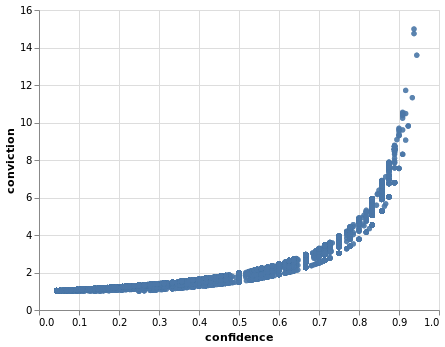

In [6]:
#Support set low so we can get a lot of points.
ruleDF1 = getrules(df,0.01,"lift")
ruleDF2 = getrules(df,0.01,"conviction")

selector = ["confidence","conviction"]

chartDF = pd.concat([ruleDF1[selector],ruleDF2[selector]])

cvcChart = alt.Chart(chartDF).mark_circle(size=30).encode(
    x='confidence',
    y='conviction')

cvcChart

### Relation between Antecedent and Consequent Support:

I expected this to be independent. This is clearly the case in the chart below:

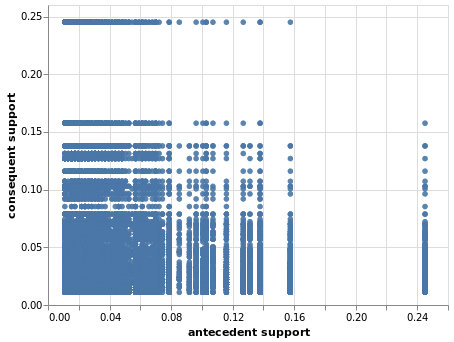

In [7]:
ruleDF1 = getrules(df,0.01,"lift")
ruleDF2 = getrules(df,0.01,"conviction")

selector = ["antecedent support","consequent support"]

chartDF = pd.concat([ruleDF1[selector],ruleDF2[selector]])

cvcChart = alt.Chart(chartDF).mark_circle(size=30).encode(
    x='antecedent support',
    y='consequent support')

cvcChart


### Relationship: Lift and Conviction:

Quite a few outliers, appears somewhat independent. Interesting curved boundaries in the area plotted (see near lift and conviction axes). 

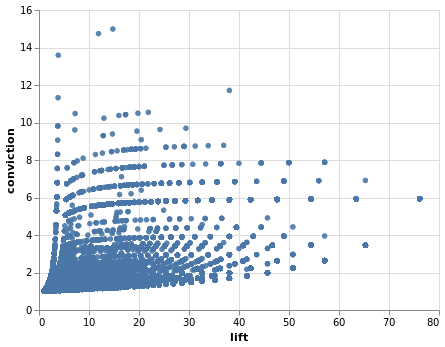

In [8]:
#What about lift and conviction?

ruleDF1 = getrules(df,0.01,"lift")
ruleDF2 = getrules(df,0.01,"conviction")

ruleDF1["class"] = "lift"
ruleDF2["class"] = "conviction" #for altair groupings.
selector = ["lift","conviction"]

chartDF = pd.concat([ruleDF1[selector],ruleDF2[selector]])

cvcChart = alt.Chart(chartDF).mark_circle(size=30).encode(
    x='lift',
    y='conviction')

cvcChart


### Graphical Visualization of Rules:

We will encode support, conviction, and lift in the following ways in our graph:

- Support (for itemsets) will be coupled to node size in the graphs.

- Lift: Indicates a positive or negative relationship - red to blue scale.

- Conviction: Strength of implication, expressed by line thickness between nodes.

In [6]:
#Support Functions:
#TO DO: Investigate double arrow relationships. Are they the same strenght, or do some overlap the others?
#Do I visualize both or the strongest one?

def strends(x):
    for y in x: #Frozensets...a weird datatype from our Apriori Algorithms. OK.
        thestr = y
    return thestr

#Given a rules Data Frame, generate an html graph.
def gen_graph(rules):
    #reset index
    rules.reset_index(inplace=True, drop=True)
    
    #make itemsets into mutable strings.
    rules["antecedents"] = rules["antecedents"].apply(strends)
    rules["consequents"] = rules["consequents"].apply(strends)
    
    #Adding nodes to our graph.
    #I use the uniqueness aspects of sets, to make sure nodes are unique.
    #aCSet = {-1}
    #aCSet.remove(-1)
    nodeDict = {}
    for rowindex in rules.index: 
        fetch = rules.iloc[rowindex]["antecedents"]
        if fetch not in nodeDict.keys():
            nodeDict[fetch] = rowindex
                    
        fetch = rules.iloc[rowindex]["consequents"]
        if fetch not in nodeDict.keys():
            nodeDict[fetch] = rowindex
        #aCSet.add(rules.iloc[rowindex]["antecedents"])
        #aCSet.add(rules.iloc[rowindex]["consequents"])
    
    net = Network(width="800px",height="800px",notebook=True,directed=True)
    
    for itemset in list(nodeDict.keys()):
        index = nodeDict[itemset]
        net.add_node(itemset, value=rules.iloc[index]["antecedent support"])  
       
    for i, row in rules.iterrows():
        if row["antecedents"] != row["consequents"]: 
            net.add_edge(source=row["antecedents"],to=row["consequents"],
                        physics=False,value=row["conviction"]*2,arrowStriketrhough=False)
    
    return net
    

In [7]:
#Ok, lets first generate some rules.
ruleDF = getrules(df,0.05,"lift") #cant use support as a metric, only for itemset prescreening?
network = gen_graph(ruleDF)
network.show("mygraph.html")

Bi-Directional arrows are seen in the graphs; they will have to be removed in the final plotting code.

### References:

1) Ning-Tan, Pan et. al (2012), Introduction to Data Mining 2nd Edition, Pearson Education.

2) Azevedo, Paulo J., Jorge Alipio M., (20??) Comparing Rule Measures for Predictive Association Rules, Universitiy of Porto, Portugal
